In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch
from torchvision import datasets, transforms
from matplotlib import cm

batch_size = 32

train_dataset = datasets.FashionMNIST('./data',
                               train=True,
                               download=False,
                               transform=transforms.Compose([
                       transforms.ToTensor(),
#                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

test_dataset = datasets.FashionMNIST('./data',
                                    train=False,
                               transform=transforms.Compose([
                       transforms.ToTensor(),
#                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                batch_size=batch_size,
                                                shuffle=False)

images = train_loader.dataset.data.detach().numpy().reshape(-1, 28*28)
print(f'Num training images: {len(images)},\tmin val: {images.min():.3f},\tmax val: {images.max():.3f}')


Num training images: 60000,	min val: 0.000,	max val: 255.000


In [25]:
pca = PCA()
pca.fit(images)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cumulative_variance_ratio > 0.95)[0][0] + 1

In [26]:
pca = PCA(n_components=n_components)
pca.fit(images)

PCA(n_components=187)

In [27]:
n_images = 5
test_images = np.array(test_loader.dataset.data[:n_images].numpy().reshape((n_images,784)))

PC_0 min: -0.0364,	PC_0 max: 0.0653
mean_img min: 0.0008,	mean_img max: 161.8764
Ammount to apply: -1487.4180
PC_0 min: -0.0364,	PC_0 max: 0.0653
mean_img min: 0.0008,	mean_img max: 161.8764
Ammount to apply: 1873.0167
PC_0 min: -0.0364,	PC_0 max: 0.0653
mean_img min: 0.0008,	mean_img max: 161.8764
Ammount to apply: 385.4747
PC_0 min: -0.0364,	PC_0 max: 0.0653
mean_img min: 0.0008,	mean_img max: 161.8764
Ammount to apply: -344.0138
PC_0 min: -0.0364,	PC_0 max: 0.0653
mean_img min: 0.0008,	mean_img max: 161.8764
Ammount to apply: 268.3975


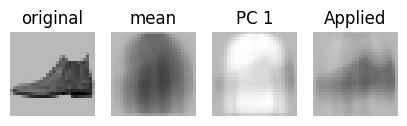

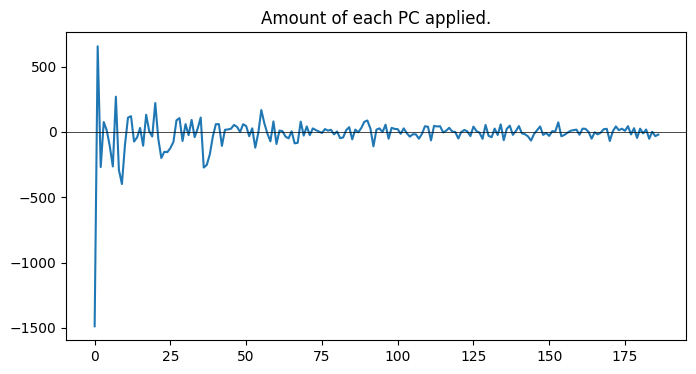

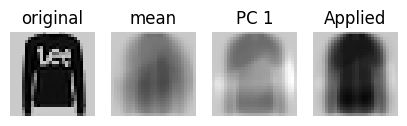

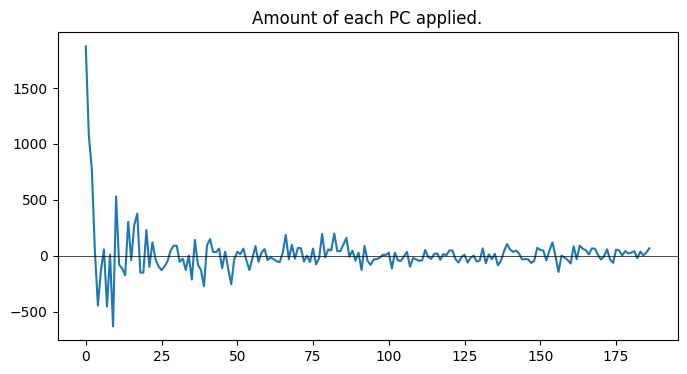

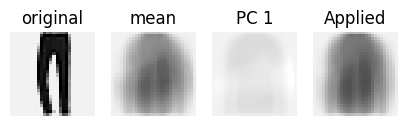

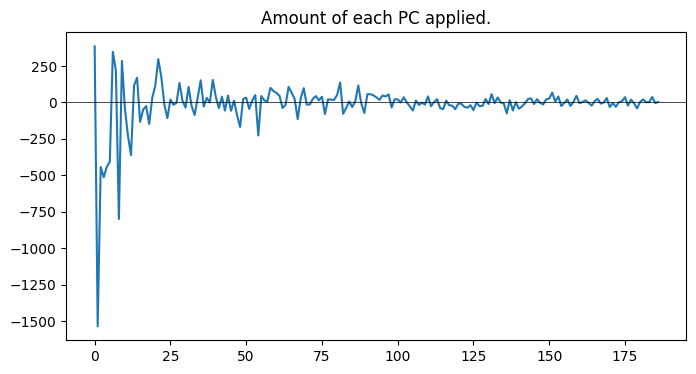

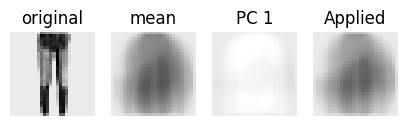

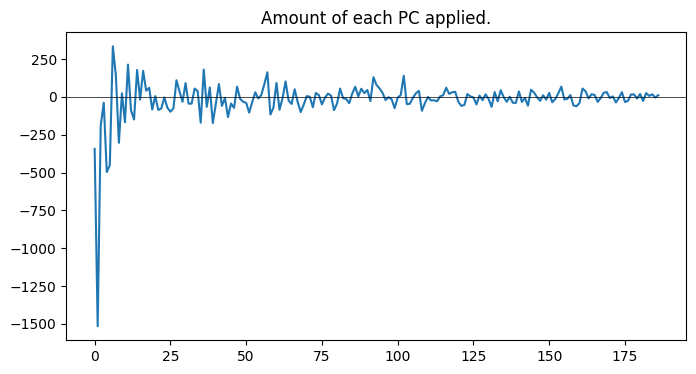

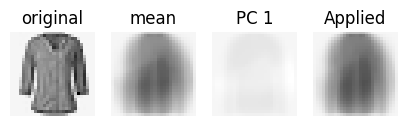

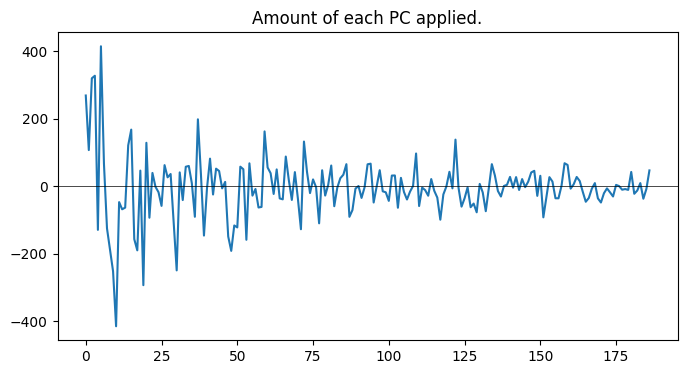

In [28]:
def draw_apply_PC0(idx):
    fig = plt.figure(figsize=(5,3))
    pca0_applied = pca.components_[0].reshape(28, 28) * pca.transform(test_images)[idx][0]
    image = pca.mean_.reshape(28, 28) + pca0_applied

    absmin = np.min([test_images[idx].min(), pca.mean_.min(), pca0_applied.min(), image.min()])
    absmax = np.max([test_images[idx].max(), pca.mean_.max(), pca0_applied.max(), image.max()])

    ax_ = fig.add_subplot(1, 4, 1)
    ax_.imshow(test_images[idx].reshape(28,28), interpolation='nearest', clim=(absmin, absmax), cmap = cm.binary);
    ax_.set_title(f'original')
    ax_.axis('off')

    ax_ = fig.add_subplot(1, 4, 2)
    ax_.imshow(pca.mean_.reshape(28,28), interpolation='nearest', clim=(absmin, absmax), cmap = cm.binary);
    ax_.set_title(f'mean')
    ax_.axis('off')

    ax_ = fig.add_subplot(1, 4, 3)
    ax_.imshow(pca0_applied, interpolation='nearest', clim=(absmin, absmax), cmap = cm.binary);
    ax_.set_title(f'PC 1')
    ax_.axis('off')

    ax_ = fig.add_subplot(1, 4, 4)
    ax_.imshow(image, interpolation='nearest', clim=(absmin, absmax), cmap = cm.binary);
    ax_.set_title(f'Applied')
    ax_.axis('off')

    print(f'PC_0 min: {pca.components_[0].min():.4f},\tPC_0 max: {pca.components_[0].max():.4f}')
    print(f'mean_img min: {pca.mean_.min():.4f},\tmean_img max: {pca.mean_.max():.4f}')
    print(f'Ammount to apply: {pca.transform(test_images)[idx][0]:.4f}')

    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    ax.plot(pca.transform(test_images[idx].reshape(1, -1)).flatten())
    ax.axhline(0, lw=.5, color='k') # horizontal lines

    ax.set_title('Amount of each PC applied.')

draw_apply_PC0(0)
draw_apply_PC0(1)
draw_apply_PC0(2)
draw_apply_PC0(3)
draw_apply_PC0(4)

## Nhận xét
- PCA giúp giảm chiều dữ liệu nhằm giảm bộ nhớ và tăng tốc độ huấn luyện mô hình, trong bài tập này em chọn số components sao cho phương sai là tầm 95% vì không muốn mất quá nhiều dữ liệu